## Visualise the geopotential height (anomalies) data
Author: Adrien Loiseau

In [1]:
# Run the help_functions.py script to have acces to the imports and helper functions
%run help_functions.py

##### Load the dataset containing the 500 hPa geopotential height data

In [2]:
file_name = "Data/ERA5_geopotential_500hPa_1940_2025_winter_midnight_Euro_Atlantic.nc"
dataset_dict = load_dataset(file_name=file_name)

Geopotential height dataset (0.25°x0.25°): (nb_days=7731, nb_lats=241, nb_longs=561, grid_size=135201)
Geopotential height dataset (0.50°x0.50°): (nb_days=7731, nb_lats=121, nb_longs=281, grid_size=34001)
Geopotential height data: (7731, 121, 281)
Reshaped geopotential height data: (7731, 34001)
Geopotential height anomalies: (7731, 121, 281)
Reshaped geopotential height anomalies: (7731, 34001)
Daily winter data from 1940 to 2025 successfully loaded. Loading time: 103.23 seconds.


### Geographical map of the domain (the Euro-Atlantic region)

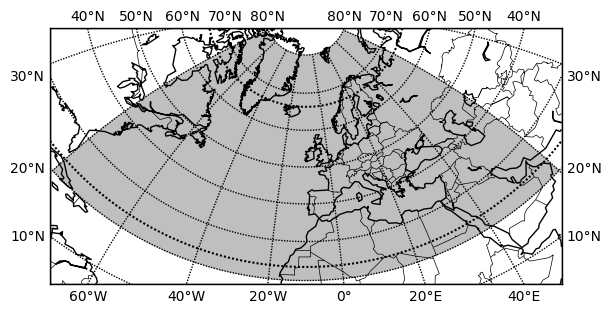

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), constrained_layout=True)
# Extract the latitude, longitude, and area variables from the dataset dictionary.
lats = dataset_dict["lats"] ; longs = dataset_dict["longs"] ; area = dataset_dict["area"]
# Create the geographical map
m = create_geographical_map(ax=ax, area=area, label_meridians_parallels=True)
lon, lat = np.meshgrid(longs, lats) # This converts the latitude/longitude coordinates into a 2D array
m.contourf(x=lon, y=lat, data=np.ones(lon.shape), colors="gray", alpha=0.5, latlon=True)
# plt.savefig("Images/Geographical_Map_Euro_Atlantic_Region.png", dpi=300, bbox_inches="tight")
plt.show()

### Geopotential height (anomalies) contour plots for two different dates

In [5]:
def plot_geopotential_height_fields_2_dates(type_plot, dates_to_plot, savefig=False):
    """
    type_plot must be either "geopotential_height" or "geopotential_height_anomalies_1_day"
    """
    nrows = 1 ; ncols = 2 ; fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*5), constrained_layout=True)
    for idx in range(nrows * ncols): # For each subplot
        row = idx // ncols ; col = idx % ncols
        date = dates_to_plot[idx]
        date_components = date.split("_")
        date_idx = compute_date_idx(year=int(date_components[0]), month=int(date_components[1]), day=int(date_components[2]), \
                                    first_year=dataset_dict["first_year"], last_year=dataset_dict["last_year"])
        ### Create the contour plot ###
        m, contour, ticks = create_contour_data(ax=axs[col], dataset_dict=dataset_dict, type_plot=type_plot, date_idx=date_idx)
        axs[col].set_title(f"{dataset_dict['dates'][date_idx]}", fontsize=15)

    ### Add a colorbar under the plots ###
    cbar = fig.colorbar(contour, ax=axs, ticks=ticks, location='bottom', extend='both', shrink=0.75, pad=0.02, aspect=40)
    cbar.ax.text(x=1.075, y=-1, s=r"[m]", transform=cbar.ax.transAxes, ha='center', va='center', fontsize=12)
    cbar.ax.tick_params(axis="x", labelsize=12)
    if (savefig == True):
        if (type_plot == "geopotential_height"):
            plt.savefig(f"Images/geopotential_height_{dates_to_plot[0]}_and_{dates_to_plot[1]}.png", dpi=300, bbox_inches='tight')
        else:
            plt.savefig(f"Images/geopotential_height_anomalies_{dates_to_plot[0]}_and_{dates_to_plot[1]}_reference_period_{dataset_dict["first_year"]}_{dataset_dict["last_year"]}.png", dpi=300, bbox_inches='tight')
    plt.show()

#### Geopotential height fields

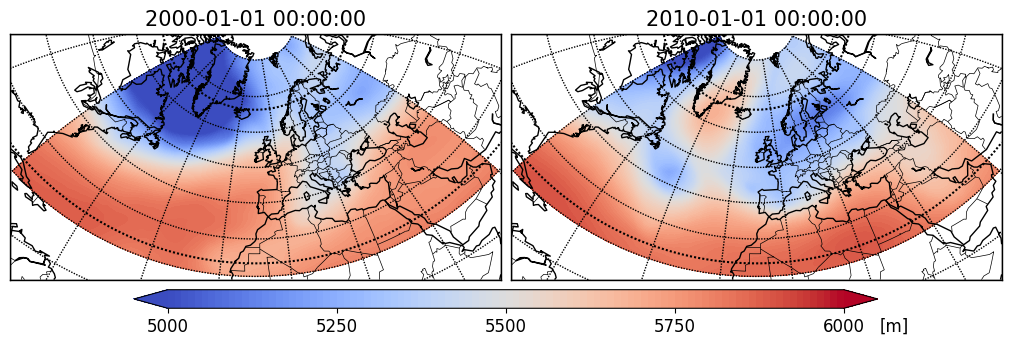

In [61]:
dates_to_plot = ["2000_01_01", "2010_01_01"]
plot_geopotential_height_fields_2_dates(type_plot="geopotential_height", dates_to_plot=dates_to_plot, savefig=False)

#### Geopotential height anomalies

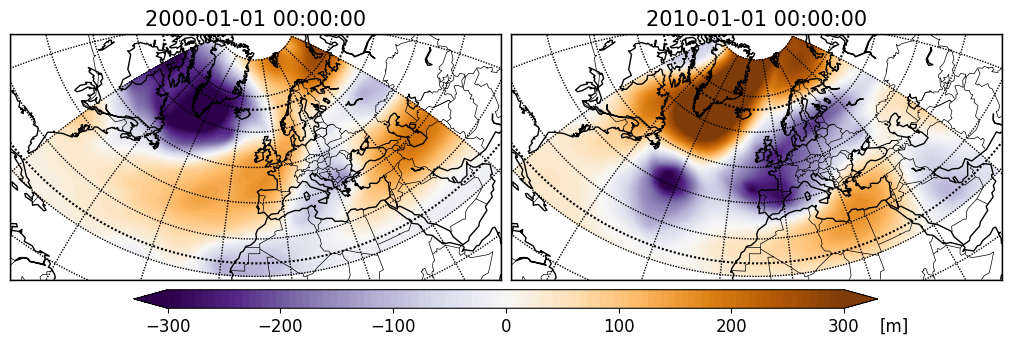

In [62]:
dates_to_plot = ["2000_01_01", "2010_01_01"]
plot_geopotential_height_fields_2_dates(type_plot="geopotential_height_anomalies_1_day", dates_to_plot=dates_to_plot, savefig=False)
# The field on the first of January 2000 corresponds to the positive phase of the NAO
# The field on the first of January 2010 corresponds to the negative phase of the NAO

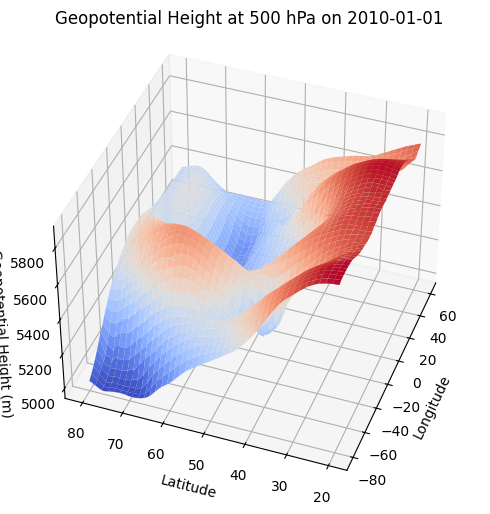

In [ ]:
# 3D plot of the geopotetial height at 500 hPa on the 1st of January 2024
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
# Extract the geopotential height data for the first day of January 2024
date = "2010-01-01"
date_components = date.split("-")
date_idx = compute_date_idx(year=int(date_components[0]), month=int(date_components[1]), day=int(date_components[2]), first_year=dataset_dict["first_year"], last_year=dataset_dict["last_year"])
geopotential_height = dataset_dict["geopotential_height"][date_idx, :, :]
# geopotential_height = dataset_dict["geopotential_height_overall_mean"]

# Create a meshgrid for the latitude and longitude coordinates
lats = dataset_dict["lats"] ; longs = dataset_dict["longs"]
lon, lat = np.meshgrid(longs, lats) # This converts the latitude/longitude coordinates into a 2D array

# Plot the geopotential height data
ax.plot_surface(X=lon, Y=lat, Z=geopotential_height, cmap="coolwarm", alpha=1)
# Set the title and labels
ax.set_title(f"Geopotential Height at 500 hPa on {date}")
ax.set_xlabel("Longitude") ; ax.set_ylabel("Latitude") ; ax.set_zlabel("Geopotential Height (m)")
# plt.savefig(f"Images/Geopotential_Height_500hPa_{date}.png", dpi=300, bbox_inches="tight")
ax.view_init(40, -160) # -170
plt.show()

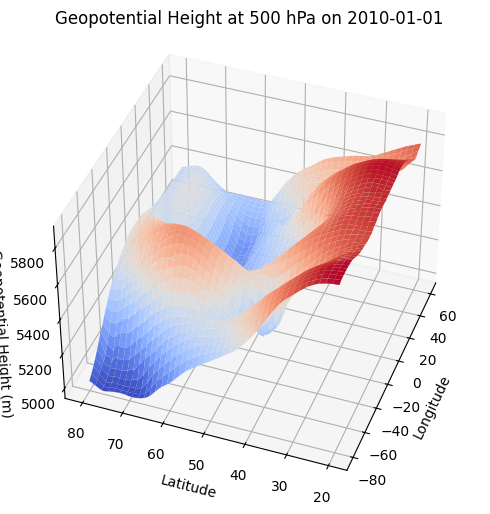

In [ ]:
# 3D plot of the geopotetial height at 500 hPa on the 1st of January 2024
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
# Extract the geopotential height data for the first day of January 2024
date = "2010-01-01"
date_components = date.split("-")
date_idx = compute_date_idx(year=int(date_components[0]), month=int(date_components[1]), day=int(date_components[2]), first_year=dataset_dict["first_year"], last_year=dataset_dict["last_year"])
geopotential_height = dataset_dict["geopotential_height"][date_idx, :, :]
# geopotential_height = dataset_dict["geopotential_height_overall_mean"]
# Create a meshgrid for the latitude and longitude coordinates
lats = dataset_dict["lats"] ; longs = dataset_dict["longs"]
lon, lat = np.meshgrid(longs, lats) # This converts the latitude/longitude coordinates into a 2D array
# Create the geographical map
# m = create_geographical_map(ax=ax, area=dataset_dict["area"], label_meridians_parallels=True)
# Plot the geopotential height data
ax.plot_surface(X=lon, Y=lat, Z=geopotential_height, cmap="coolwarm", alpha=1)
# Set the title and labels
ax.set_title(f"Geopotential Height at 500 hPa on {date}")
ax.set_xlabel("Longitude") ; ax.set_ylabel("Latitude") ; ax.set_zlabel("Geopotential Height (m)")
# plt.savefig(f"Images/Geopotential_Height_500hPa_{date}.png", dpi=300, bbox_inches="tight")
ax.view_init(40, -160) # -170
plt.show()

In [1]:
# plot_geopotential_height(dataset_dict=dataset_dict, date=f"2000_01_01", type_plot="geopotential_height", set_title=False, save_fig=True, show_fig=True)

##### Plot the weekly 500 hPa geopotential height anomalies for a few winters in the dataset.

Running average 1: First day: 2000-12-01 00:00:00 - Last day: 2000-12-10 00:00:00
Running average 2: First day: 2000-12-11 00:00:00 - Last day: 2000-12-20 00:00:00
Running average 3: First day: 2000-12-21 00:00:00 - Last day: 2000-12-30 00:00:00
Running average 4: First day: 2000-12-31 00:00:00 - Last day: 2001-01-09 00:00:00
Running average 5: First day: 2001-01-10 00:00:00 - Last day: 2001-01-19 00:00:00
Running average 6: First day: 2001-01-20 00:00:00 - Last day: 2001-01-29 00:00:00
Running average 7: First day: 2001-01-30 00:00:00 - Last day: 2001-02-08 00:00:00
Running average 8: First day: 2001-02-09 00:00:00 - Last day: 2001-02-18 00:00:00


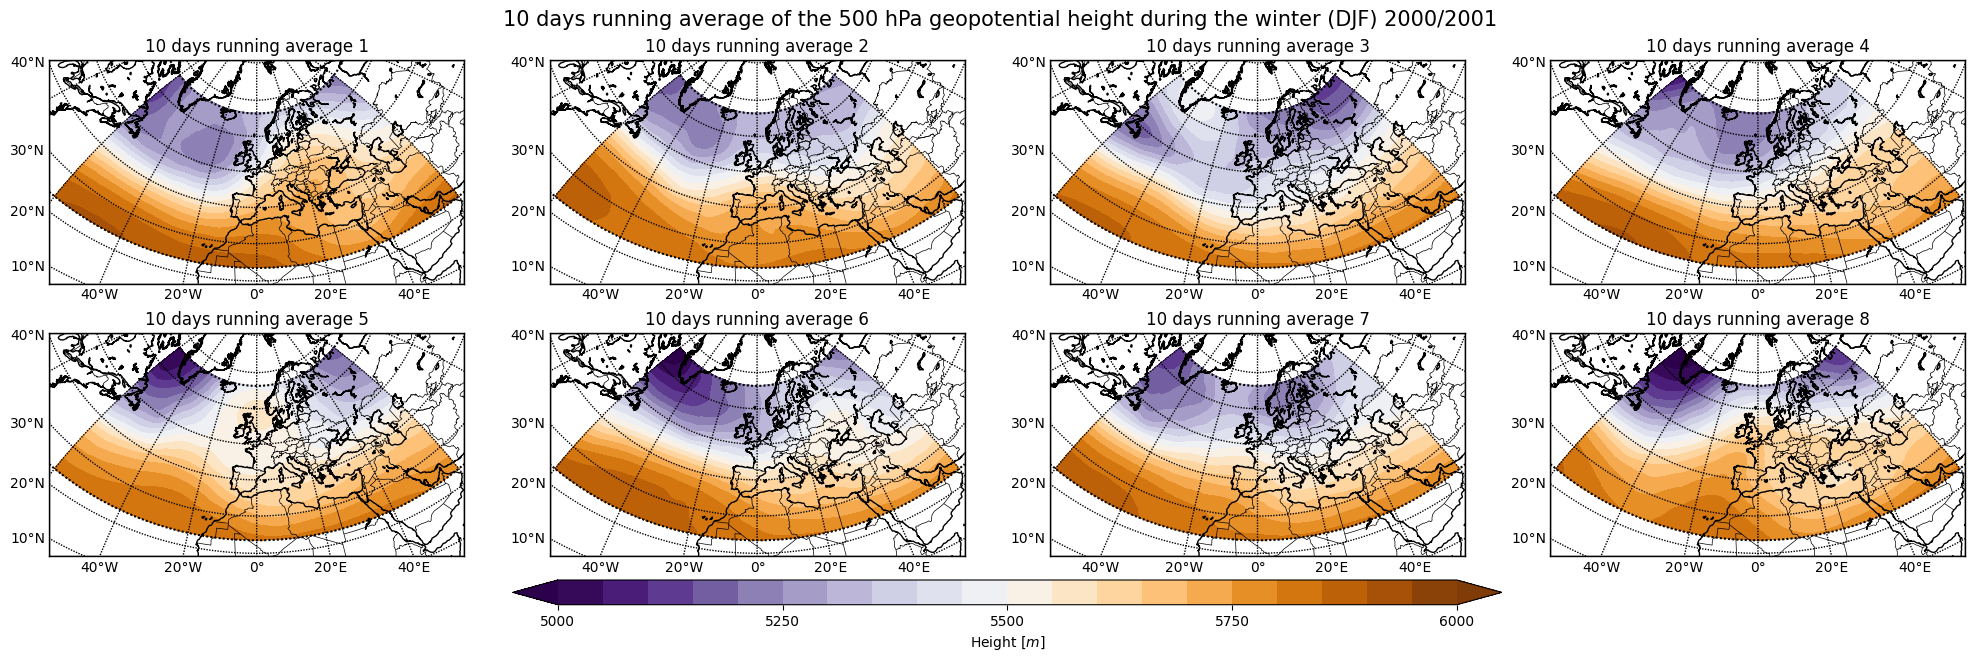

In [10]:
# Create figure and axes instances
nrows = 2 ; ncols = 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*3+0.5), constrained_layout=True)

year_start_idx = 31+29 # !!! Start from the 1st of December of 1940

for idx in range(nrows*ncols): # Loop over the months (starting from 0 --> +1 --> January=1)
    row = idx // ncols
    col = idx % ncols

    # Compute the average geopotential height over the week
    nb_days_running_average = 10
    geopotential_height_week_idx_average = np.mean(dataset_dict["geopotential_height"][year_start_idx + idx*nb_days_running_average : year_start_idx + (idx+1)*nb_days_running_average, :, :], axis=0)
    print(f"Running average {idx+1}: First day: {dataset_dict["dates"][year_start_idx + idx*nb_days_running_average]} - Last day: {dataset_dict["dates"][year_start_idx + (idx+1)*nb_days_running_average-1]}")

    # Create the contour plot
    m, contour, ticks = create_contour_data(ax=axs[row, col], dataset_dict=dataset_dict, type_plot="geopotential_height", labels_meridian_right=False, geopotential_height_data_to_plot=geopotential_height_week_idx_average)

    axs[row, col].set_title(f"{nb_days_running_average} days running average {idx+1}")

fig.suptitle(f"{nb_days_running_average} days running average of the 500 hPa geopotential height during the winter (DJF) {dataset_dict["first_year"]}/{dataset_dict["first_year"]+1}", fontsize=15)

# Add a colorbar under the last row of subplots
cbar = fig.colorbar(contour, ax=axs, ticks=ticks, location='bottom', extend='both', shrink=0.5, pad=0.01, aspect=40)
cbar.set_label(r'Height $[m]$')

##### Plot the monthly 500 hPa geopotential height anomalies for a few winters in the dataset.

December 2001: First day: 2000-12-01 00:00:00 - Last day: 2000-12-31 00:00:00
January 2001: First day: 2001-01-01 00:00:00 - Last day: 2001-01-31 00:00:00
February 2001: First day: 2001-02-01 00:00:00 - Last day: 2001-02-28 00:00:00
December 2002: First day: 2001-12-01 00:00:00 - Last day: 2001-12-31 00:00:00
January 2002: First day: 2002-01-01 00:00:00 - Last day: 2002-01-31 00:00:00
February 2002: First day: 2002-02-01 00:00:00 - Last day: 2002-02-28 00:00:00


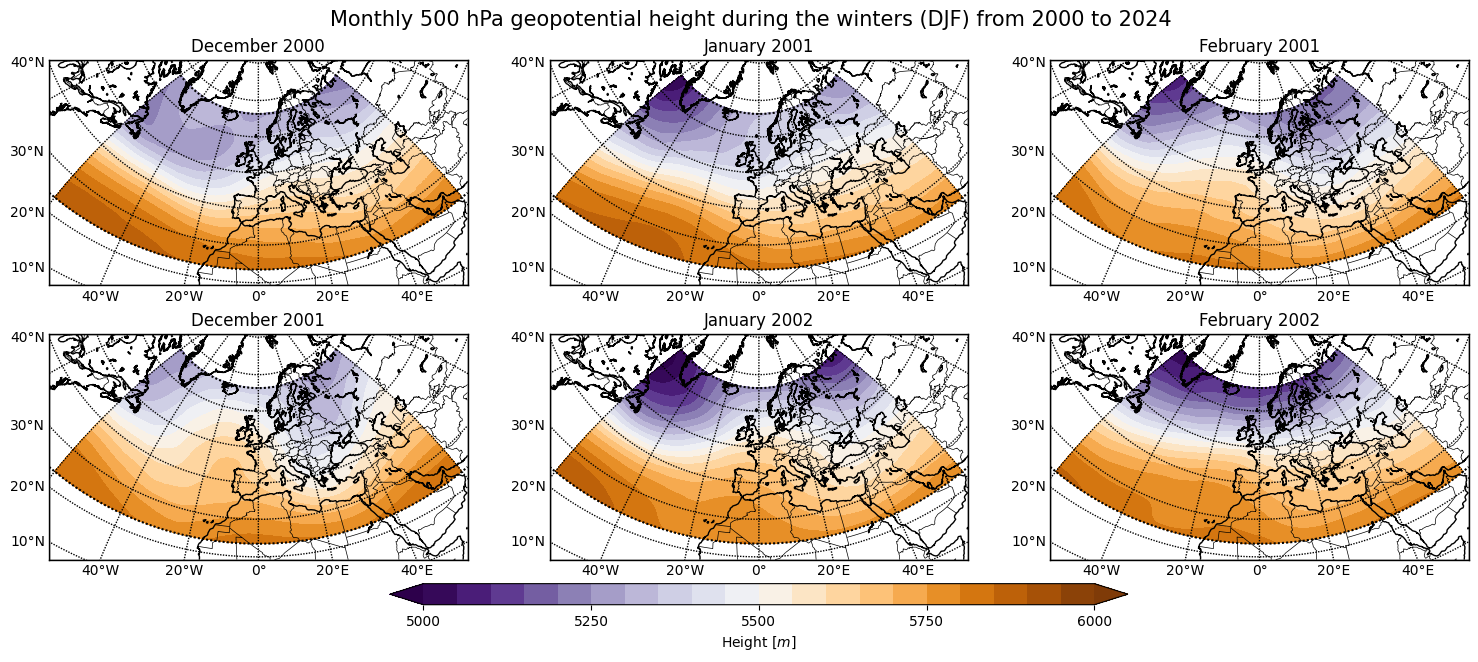

In [ ]:
# Create figure and axes instances
nrows = 2 ; ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*3+0.5), constrained_layout=True)

last_day_in_month_idx = 31+29 # !!! Start from the 1st of December of the first year (skip the months of January and February of the first year to begin with a full winter)

for idx in range(nrows*ncols): # Loop over the months (starting from 0 --> +1 --> January=1)
    row = idx // ncols ; col = idx % ncols

    year = dataset_dict["first_year"] + 1 + row # Start from the second year and increment by one each time we reach the end of a row

    # Define the first and last day in the month (by considering the possibility of leap years)
    first_day_in_month_idx = last_day_in_month_idx
    if (col == 2): # February
        if (year % 4 != 0): # Non-leap year
            last_day_in_month_idx += 28
        else: # Leap year
            last_day_in_month_idx += 29
    else:
        last_day_in_month_idx += 31
    
    # Compute the average geopotential height over the month
    geopotential_height_month_idx_average = np.mean(dataset_dict["geopotential_height"][first_day_in_month_idx:last_day_in_month_idx, :, :], axis=0)
    print(f"{dict_winter_months[col]} {year}: First day: {dataset_dict["dates"][first_day_in_month_idx]} - Last day: {dataset_dict["dates"][last_day_in_month_idx-1]}")

    m, contour, ticks = create_contour_data(ax=axs[row, col], dataset_dict=dataset_dict, type_plot="geopotential_height", labels_meridian_right=False, geopotential_height_data_to_plot=geopotential_height_month_idx_average)

    # Define the years corresponding to the winter months
    if (col == 0): axs[row, col].set_title(f"{dict_winter_months[col]} {year-1}") # December
    else: axs[row, col].set_title(f"{dict_winter_months[col]} {year}") # January and February

fig.suptitle(f"Monthly 500 hPa geopotential height during the winters (DJF) from {dataset_dict["first_year"]} to {dataset_dict["last_year"]}", fontsize=15)

# Add a colorbar under the last row of subplots
cbar = fig.colorbar(contour, ax=axs, ticks=ticks, location='bottom', extend='both', shrink=0.5, pad=0.01, aspect=35)
cbar.set_label(r'Height $[m]$')

-----------
# ANOMALIES
-----------

##### Plot the weekly 500 hPa geopotential height anomalies for a few winters in the dataset.

Running average 1: First day: 2000-12-01 00:00:00 - Last day: 2000-12-10 00:00:00
Running average 2: First day: 2000-12-11 00:00:00 - Last day: 2000-12-20 00:00:00
Running average 3: First day: 2000-12-21 00:00:00 - Last day: 2000-12-30 00:00:00
Running average 4: First day: 2000-12-31 00:00:00 - Last day: 2001-01-09 00:00:00
Running average 5: First day: 2001-01-10 00:00:00 - Last day: 2001-01-19 00:00:00
Running average 6: First day: 2001-01-20 00:00:00 - Last day: 2001-01-29 00:00:00
Running average 7: First day: 2001-01-30 00:00:00 - Last day: 2001-02-08 00:00:00
Running average 8: First day: 2001-02-09 00:00:00 - Last day: 2001-02-18 00:00:00
Running average 9: First day: 2001-02-19 00:00:00 - Last day: 2001-02-28 00:00:00
Running average 10: First day: 2001-12-01 00:00:00 - Last day: 2001-12-10 00:00:00
Running average 11: First day: 2001-12-11 00:00:00 - Last day: 2001-12-20 00:00:00
Running average 12: First day: 2001-12-21 00:00:00 - Last day: 2001-12-30 00:00:00


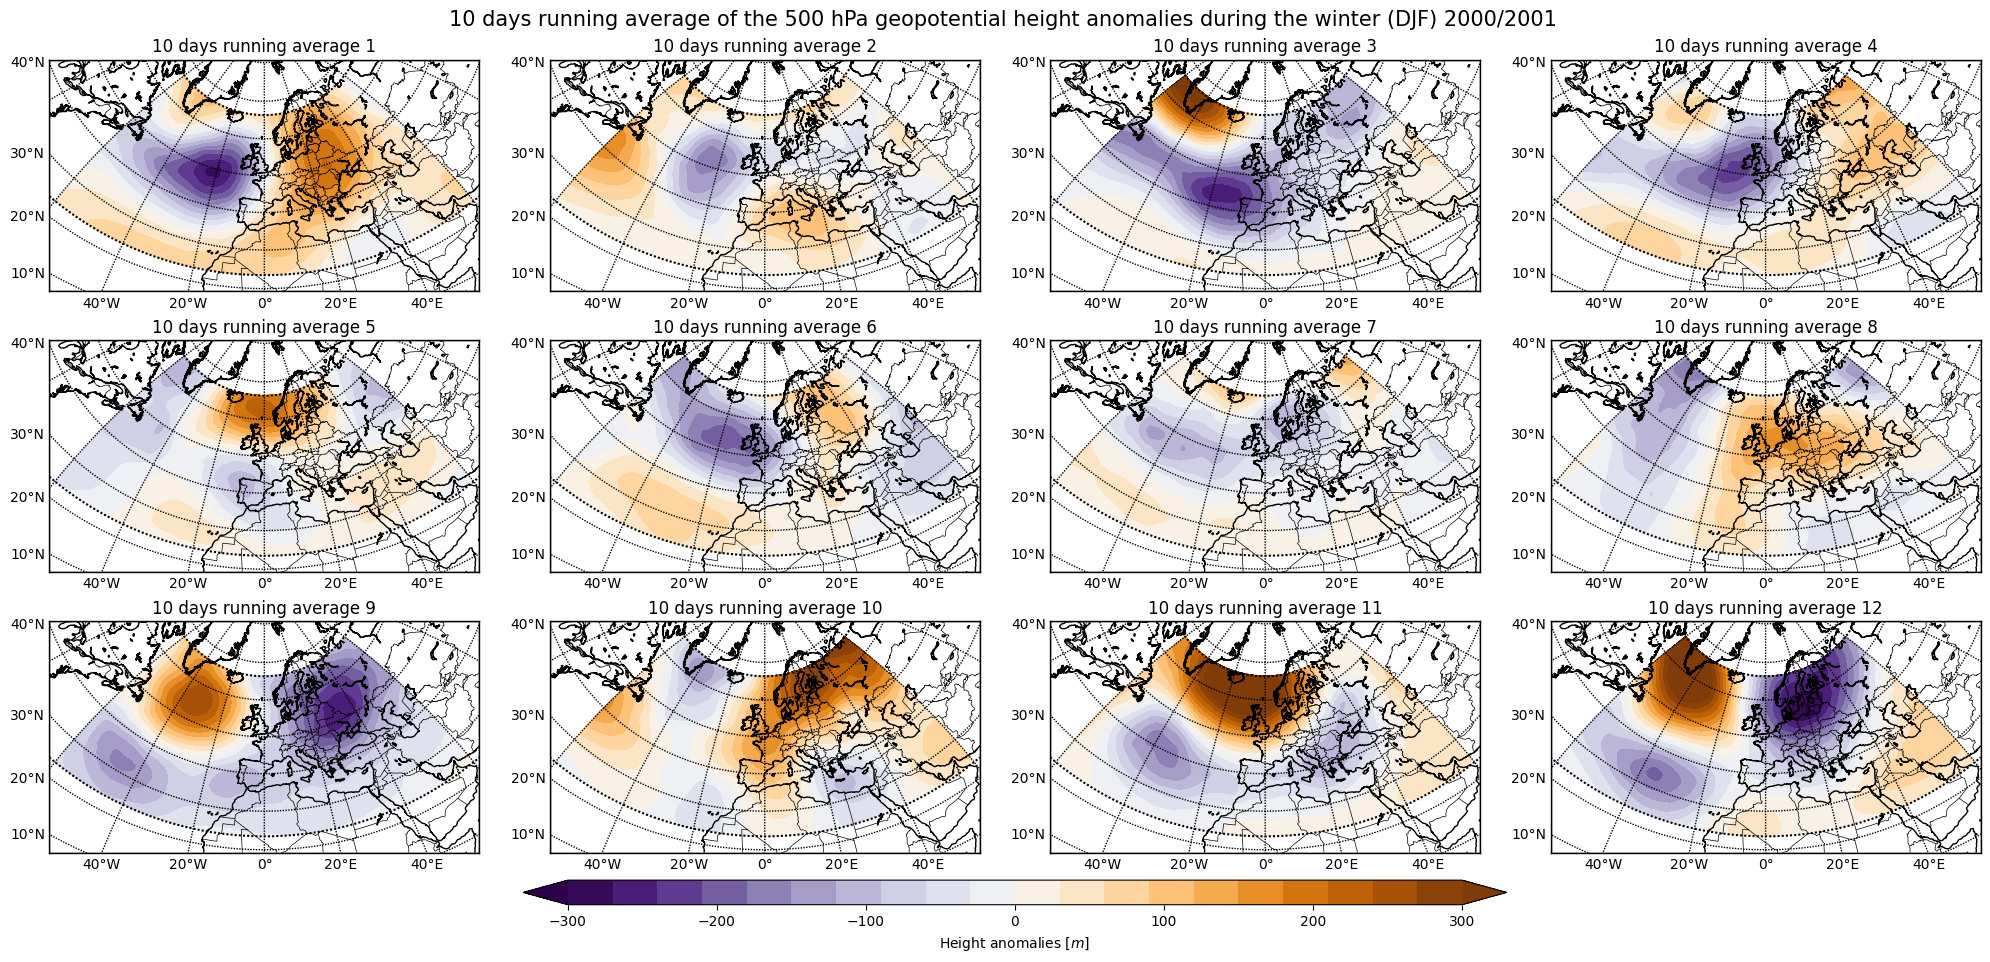

In [ ]:
# Create figure and axes instances
nrows = 3 ; ncols = 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*3+0.5), constrained_layout=True)

year_start_idx = 31+29 # !!! Start from the 1st of December of the first year (skip the months of January and February of the first year to begin with a full winter)

for idx in range(nrows*ncols): # Loop over the weeks (starting from 0 --> +1)
    row = idx // ncols ; col = idx % ncols

    # Compute the average geopotential height over the week
    nb_days_running_average = 10
    geopotential_height_anomalies_week_idx_average = np.mean(dataset_dict["geopotential_height_anomalies"][year_start_idx + idx*nb_days_running_average : year_start_idx + (idx+1)*nb_days_running_average, :, :], axis=0)
    print(f"Running average {idx+1}: First day: {dataset_dict["dates"][year_start_idx + idx*nb_days_running_average]} - Last day: {dataset_dict["dates"][year_start_idx + (idx+1)*nb_days_running_average-1]}")

    # Create the contour plot
    m, contour, ticks = create_contour_data(ax=axs[row, col], dataset_dict=dataset_dict, type_plot="geopotential_height_anomalies_1_day", labels_meridian_right=False, \
                                            geopotential_height_data_to_plot=geopotential_height_anomalies_week_idx_average)

    axs[row, col].set_title(f"{nb_days_running_average} days running average {idx+1}")

fig.suptitle(f"{nb_days_running_average} days running average of the 500 hPa geopotential height anomalies during the winter (DJF) {dataset_dict["first_year"]}/{dataset_dict["first_year"]+1}", fontsize=15)

# Add a colorbar under the last row of subplots
cbar = fig.colorbar(contour, ax=axs, ticks=ticks, location='bottom', extend='both', shrink=0.5, pad=0.01, aspect=40)
cbar.set_label(r'Height anomalies $[m]$')

##### Plot the monthly 500 hPa geopotential height anomalies for a few winters in the dataset.

December 2001: First day: 2000-12-01 00:00:00 - Last day: 2000-12-31 00:00:00
January 2001: First day: 2001-01-01 00:00:00 - Last day: 2001-01-31 00:00:00
February 2001: First day: 2001-02-01 00:00:00 - Last day: 2001-02-28 00:00:00
December 2002: First day: 2001-12-01 00:00:00 - Last day: 2001-12-31 00:00:00
January 2002: First day: 2002-01-01 00:00:00 - Last day: 2002-01-31 00:00:00
February 2002: First day: 2002-02-01 00:00:00 - Last day: 2002-02-28 00:00:00
December 2003: First day: 2002-12-01 00:00:00 - Last day: 2002-12-31 00:00:00
January 2003: First day: 2003-01-01 00:00:00 - Last day: 2003-01-31 00:00:00
February 2003: First day: 2003-02-01 00:00:00 - Last day: 2003-02-28 00:00:00
December 2004: First day: 2003-12-01 00:00:00 - Last day: 2003-12-31 00:00:00
January 2004: First day: 2004-01-01 00:00:00 - Last day: 2004-01-31 00:00:00
February 2004: First day: 2004-02-01 00:00:00 - Last day: 2004-02-29 00:00:00


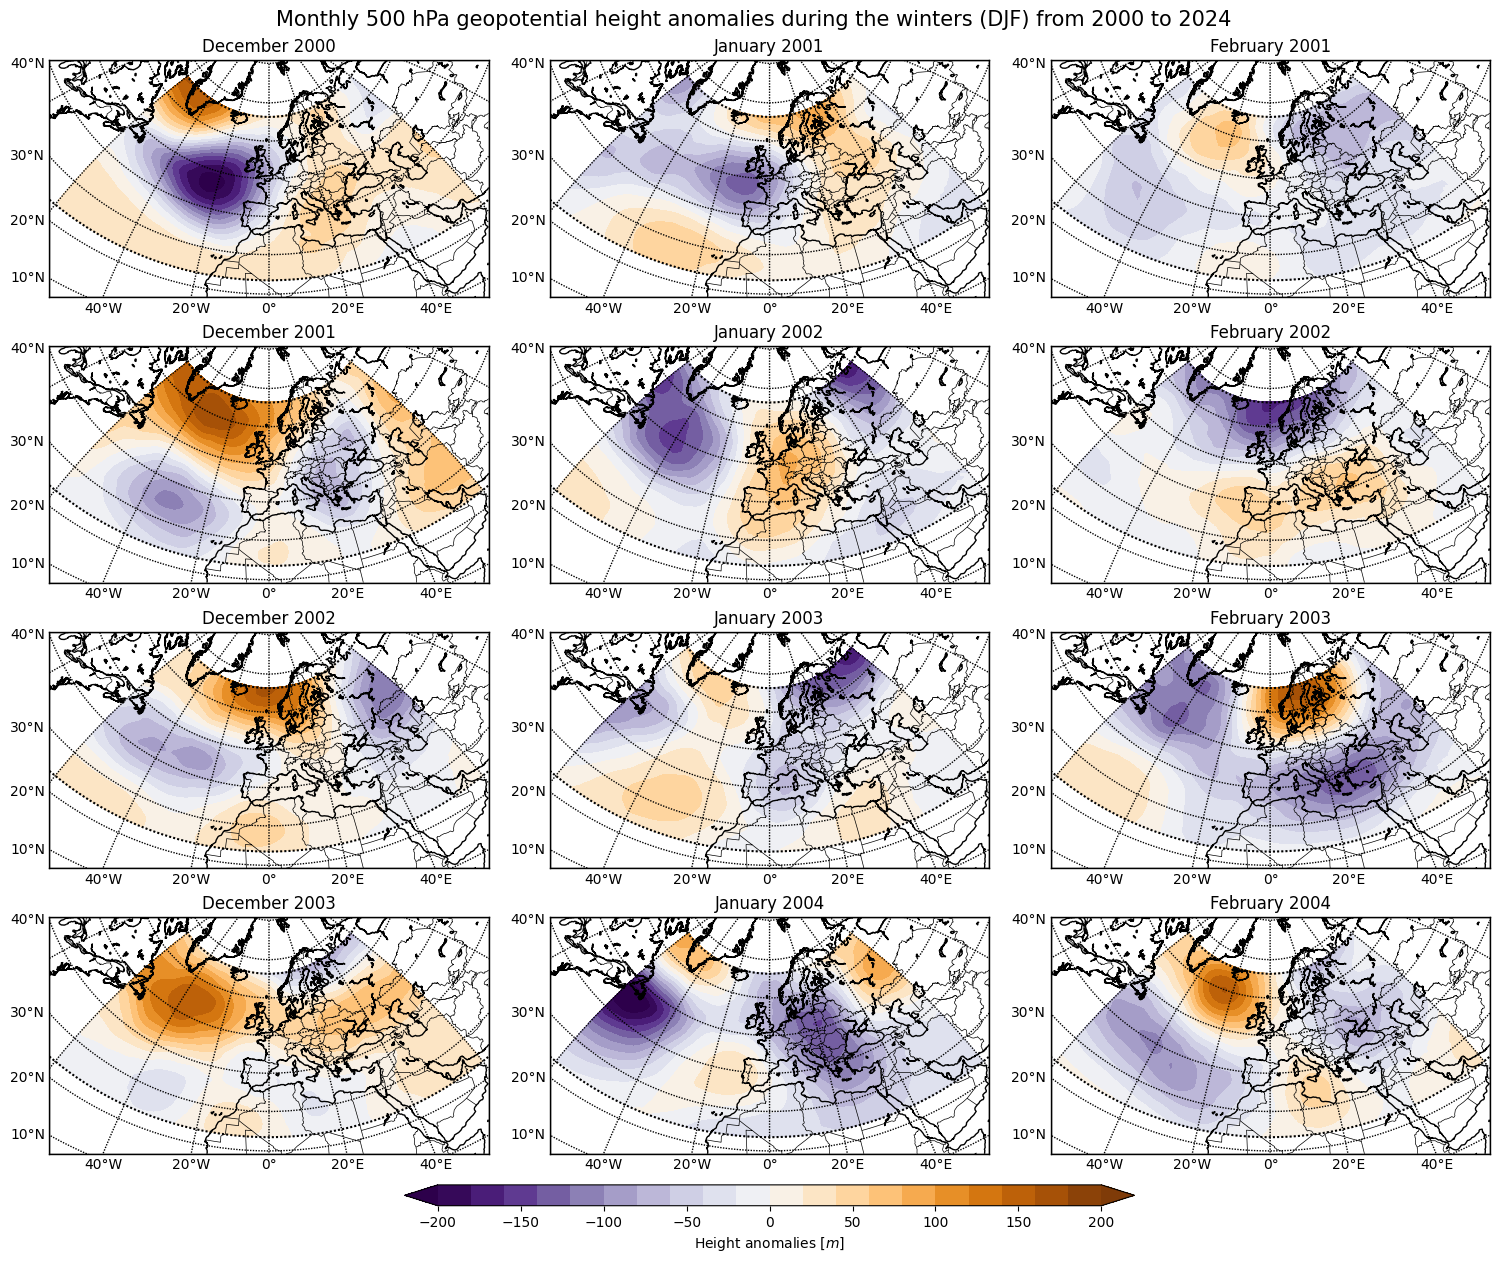

In [ ]:
# Create figure and axes instances
nrows = 4 ; ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*3+0.5), constrained_layout=True)

last_day_in_month_idx = 31+29 # !!! Start from the 1st of December of the first year (skip the months of January and February of the first year to begin with a full winter)

for idx in range(nrows*ncols): # Loop over the months (starting from 0 --> +1 --> January=1)
    row = idx // ncols ; col = idx % ncols

    year = dataset_dict["first_year"] + 1 + row # Start from the second year and increment by one each time we reach the end of a row

    # Define the first and last day in the month (by considering the possibility of leap years)
    first_day_in_month_idx = last_day_in_month_idx
    if (col == 2): # February
        if (year % 4 != 0): # Non-leap year
            last_day_in_month_idx += 28
        else: # Leap year
            last_day_in_month_idx += 29
    else:
        last_day_in_month_idx += 31
    
    # Compute the average geopotential height over the month
    geopotential_height_anomalies_month_idx_average = np.mean(dataset_dict["geopotential_height_anomalies"][first_day_in_month_idx:last_day_in_month_idx, :, :], axis=0)
    print(f"{dict_winter_months[col]} {year}: First day: {dataset_dict["dates"][first_day_in_month_idx]} - Last day: {dataset_dict["dates"][last_day_in_month_idx-1]}")

    m, contour, ticks = create_contour_data(ax=axs[row, col], dataset_dict=dataset_dict, type_plot="geopotential_height_anomaly_temporal_mean", labels_meridian_right=False,
                                            geopotential_height_data_to_plot=geopotential_height_anomalies_month_idx_average)

    # Define the years corresponding to the winter months
    if (col == 0): axs[row, col].set_title(f"{dict_winter_months[col]} {year-1}") # December
    else: axs[row, col].set_title(f"{dict_winter_months[col]} {year}") # January and February

fig.suptitle(f"Monthly 500 hPa geopotential height anomalies over the winters (DJF) from {dataset_dict["first_year"]} to {dataset_dict["last_year"]}", fontsize=15)

# Add a colorbar under the last row of subplots
cbar = fig.colorbar(contour, ax=axs, ticks=ticks, location='bottom', extend='both', shrink=0.5, pad=0.01, aspect=35)
cbar.set_label(r'Height anomalies $[m]$')

In [29]:
euclidian_norm_array = []
for day in range(len(dataset_dict["dates"])):
    euclidian_norm_array.append(np.linalg.norm(dataset_dict["geopotential_height"][day, :, :] - dataset_dict["geopotential_height_overall_mean"]))

---
## Analysis of the dataset
---

#### Mean geopotential height field over the winter months (DJF) from 1940 to 2025

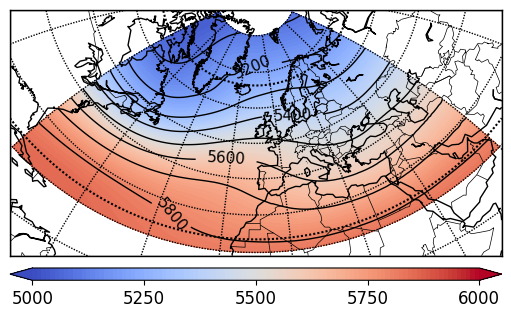

In [ ]:
%run help_functions.py
plot_geopotential_height(dataset_dict=dataset_dict, type_plot="mean_geopotential_height", set_title=False, save_fig=False, show_fig=True)

In [5]:
print(np.min(dataset_dict["geopotential_height_overall_variance"]), np.max(dataset_dict["geopotential_height_overall_variance"]))

705.2107 35585.156


#### Variance of the daily geopotential height fields over the winter months (DJF) from 1940 to 2025

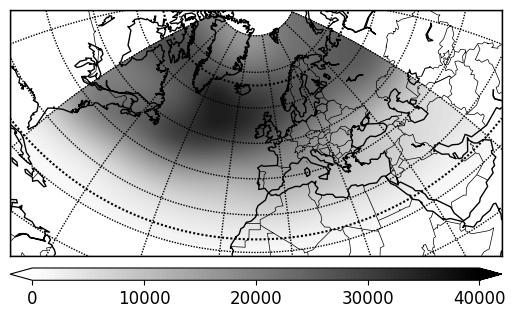

In [59]:
%run help_functions.py
plot_geopotential_height(dataset_dict=dataset_dict, type_plot="variance_geopotential_height", set_title=False, save_fig=False, show_fig=True)

In [ ]:
nb_lats = len(dataset_dict["lats"]) ; nb_longs = len(dataset_dict["longs"])
mean_field_december = np.zeros((nb_lats, nb_longs)) ; nb_december_days = 0
mean_field_january = np.zeros((nb_lats, nb_longs))  ; nb_january_days  = 0
mean_field_february = np.zeros((nb_lats, nb_longs)) ; nb_february_days = 0
for year in range(dataset_dict["first_year"], dataset_dict["last_year"]+1):
    if (year == dataset_dict["first_year"]): year_start_idx = 0 ; year_end_idx = 60
    elif (year % 4 == 0): year_start_idx = year_end_idx ; year_end_idx += 91 # Leap year
    else: year_start_idx = year_end_idx ; year_end_idx += 90 # Non-leap year

    if (year == dataset_dict["first_year"]):
        for day in range(year_start_idx, year_start_idx + 31):
            mean_field_january += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_january_days += 1
        for day in range(year_start_idx + 31, year_end_idx):
            mean_field_february += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_february_days += 1

    else:
        for day in range(year_start_idx, year_start_idx + 31):
            mean_field_december += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_december_days += 1
        for day in range(year_start_idx + 31, year_start_idx + 31 + 31):
            mean_field_january += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_january_days += 1
        for day in range(year_start_idx + 31 + 31, year_end_idx):
            mean_field_february += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_february_days += 1

mean_field_december /= nb_december_days ; mean_field_january /= nb_january_days ; mean_field_february /= nb_february_days
print(f"Number of days in December: {nb_december_days} - Number of days in January: {nb_january_days} - Number of days in February: {nb_february_days} - (Sum: {nb_december_days + nb_january_days + nb_february_days})")

Number of days in December: 2635 - Number of days in January: 2666 - Number of days in February: 2430 - (Sum: 7731)


In [52]:
print(np.min(mean_field_december), np.max(mean_field_december))
print(np.min(mean_field_january), np.max(mean_field_january))
print(np.min(mean_field_february), np.max(mean_field_february))

-1.4413493610649906 41.276303998161765
-24.592774719558797 1.272929438414291
-28.470512635030865 10.49290324395576


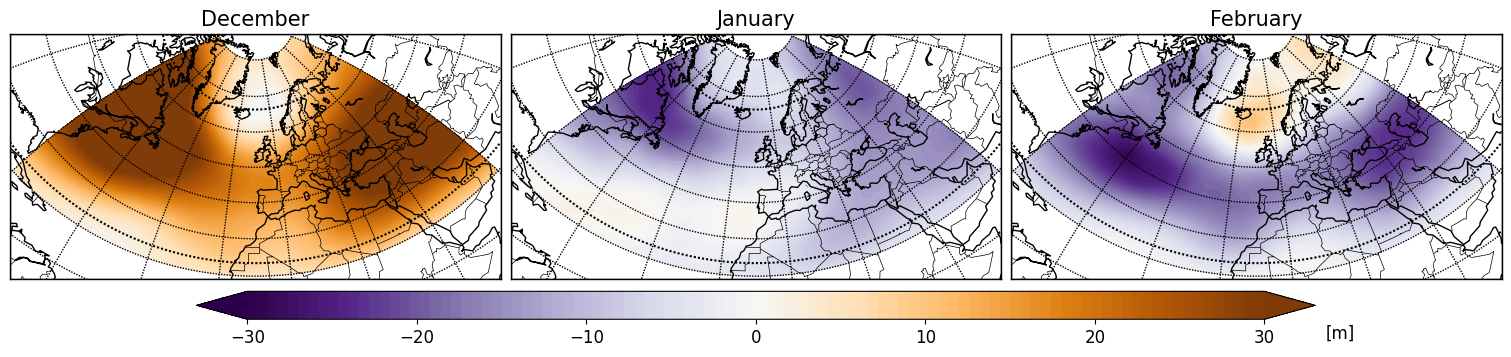

In [ ]:
%run help_functions.py
### Create figure and axes instances ###
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5.5), constrained_layout=True)
m, contour, ticks = create_contour_data(ax=axs[0], dataset_dict=dataset_dict, type_plot="mean_geopotential_height_anomalies", geopotential_height_data_to_plot=mean_field_december)
m, contour, ticks = create_contour_data(ax=axs[1], dataset_dict=dataset_dict, type_plot="mean_geopotential_height_anomalies", geopotential_height_data_to_plot=mean_field_january)
m, contour, ticks = create_contour_data(ax=axs[2], dataset_dict=dataset_dict, type_plot="mean_geopotential_height_anomalies", geopotential_height_data_to_plot=mean_field_february)
axs[0].set_title(f"December", fontsize=15) ; axs[1].set_title(f"January", fontsize=15) ; axs[2].set_title(f"February", fontsize=15)

### Add a colorbar under the plots ###
cbar = fig.colorbar(contour, ax=axs, ticks=ticks, location='bottom', extend='both', shrink=0.75, pad=0.02, aspect=40)
cbar.ax.text(x=1.075, y=-0.5, s=r"[m]", transform=cbar.ax.transAxes, ha='center', va='center', fontsize=12)
cbar.ax.tick_params(axis="x", labelsize=12)
plt.show()

In [44]:
nb_lats = len(dataset_dict["lats"]) ; nb_longs = len(dataset_dict["longs"])
mean_field_december_first_half = np.zeros((nb_lats, nb_longs)) ; nb_december_first_half_days = 0
mean_field_december_second_half = np.zeros((nb_lats, nb_longs)) ; nb_december_second_half_days = 0
mean_field_january_first_half = np.zeros((nb_lats, nb_longs))  ; nb_january_first_half_days  = 0
mean_field_january_second_half = np.zeros((nb_lats, nb_longs))  ; nb_january_second_half_days  = 0
mean_field_february_first_half = np.zeros((nb_lats, nb_longs)) ; nb_february_first_half_days = 0
mean_field_february_second_half = np.zeros((nb_lats, nb_longs)) ; nb_february_second_half_days = 0

for year in range(dataset_dict["first_year"], dataset_dict["last_year"]+1):
    if (year == dataset_dict["first_year"]): year_start_idx = 0 ; year_end_idx = 60
    elif (year % 4 == 0): year_start_idx = year_end_idx ; year_end_idx += 91 # Leap year
    else: year_start_idx = year_end_idx ; year_end_idx += 90 # Non-leap year

    if (year == dataset_dict["first_year"]):
        for day in range(year_start_idx, year_start_idx + 15):
            mean_field_january_first_half += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_january_first_half_days += 1
        for day in range(year_start_idx + 15, year_start_idx + 31):
            mean_field_january_second_half += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_january_second_half_days += 1
        for day in range(year_start_idx + 31, year_start_idx + 31 + 15):
            mean_field_february_first_half += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_february_first_half_days += 1
        for day in range(year_start_idx + 31 + 15, year_end_idx):
            mean_field_february_second_half += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_february_second_half_days += 1

    else:
        for day in range(year_start_idx, year_start_idx + 15):
            mean_field_december_first_half += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_december_first_half_days += 1
        for day in range(year_start_idx + 15, year_start_idx + 31):
            mean_field_december_second_half += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_december_second_half_days += 1
        for day in range(year_start_idx + 31, year_start_idx + 31 + 15):
            mean_field_january_first_half += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_january_first_half_days += 1
        for day in range(year_start_idx + 31 + 15, year_start_idx + 31 + 31):
            mean_field_january_second_half += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_january_second_half_days += 1
        for day in range(year_start_idx + 31 + 31, year_start_idx + 31 + 31 + 15):
            mean_field_february_first_half += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_february_first_half_days += 1
        for day in range(year_start_idx + 31 + 31 + 15, year_end_idx):
            mean_field_february_second_half += dataset_dict["geopotential_height_anomalies"][day, :, :] ; nb_february_second_half_days += 1

mean_field_december_first_half /= nb_december_first_half_days ; mean_field_december_second_half /= nb_december_second_half_days
mean_field_january_first_half /= nb_january_first_half_days ; mean_field_january_second_half /= nb_january_second_half_days
mean_field_february_first_half /= nb_february_first_half_days ; mean_field_february_second_half /= nb_february_second_half_days

In [47]:
print(np.min(mean_field_december_first_half), np.max(mean_field_december_first_half))
print(np.min(mean_field_december_second_half), np.max(mean_field_december_second_half))
print(np.min(mean_field_january_first_half), np.max(mean_field_january_first_half))
print(np.min(mean_field_january_second_half), np.max(mean_field_january_second_half))
print(np.min(mean_field_february_first_half), np.max(mean_field_february_first_half))
print(np.min(mean_field_february_second_half), np.max(mean_field_february_second_half))

1.8298851102941176 63.18447763480392
-14.937320484834558 29.70095537971048
-33.8852054566376 5.902370245881783
-35.28151898051417 2.266599788222202
-36.279543665213176 20.297699778948644
-34.49405239172149 23.91975825794956


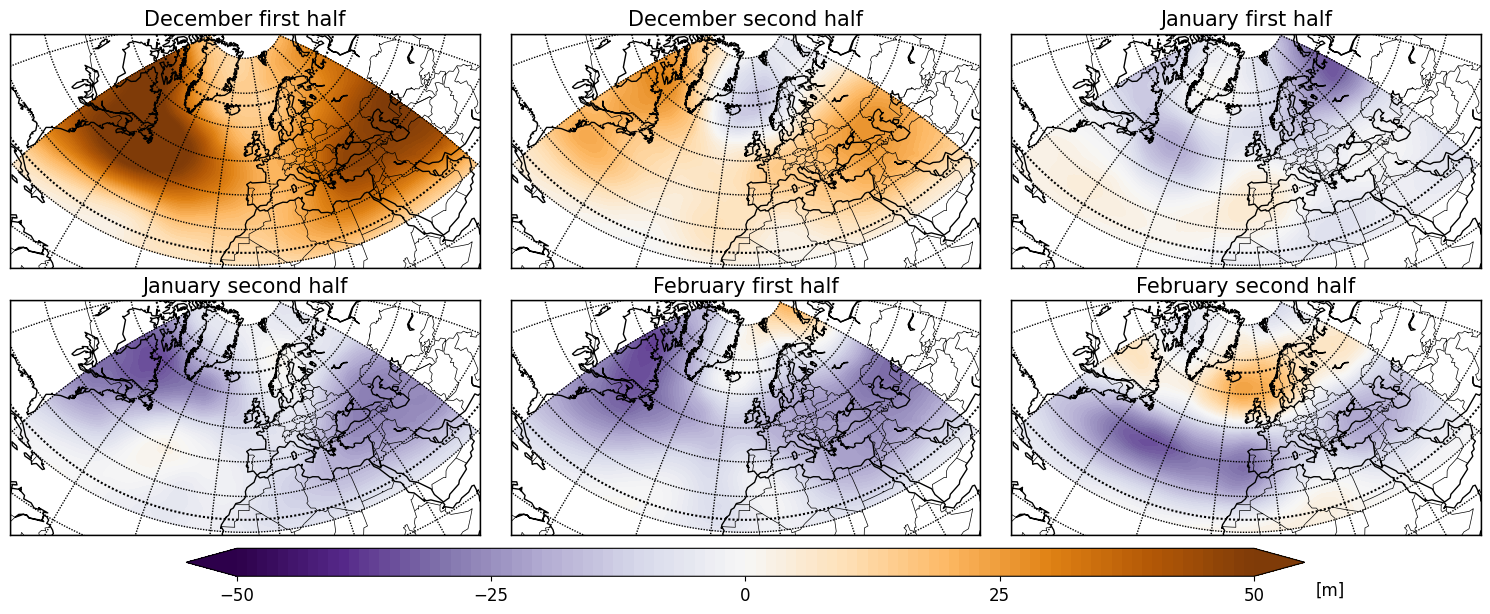

In [53]:
%run help_functions.py
### Create figure and axes instances ###
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 6), constrained_layout=True)
m, contour, ticks = create_contour_data(ax=axs[0,0], dataset_dict=dataset_dict, type_plot="mean_geopotential_height_anomalies", geopotential_height_data_to_plot=mean_field_december_first_half)
m, contour, ticks = create_contour_data(ax=axs[0,1], dataset_dict=dataset_dict, type_plot="mean_geopotential_height_anomalies", geopotential_height_data_to_plot=mean_field_december_second_half)
axs[0,0].set_title(f"December first half", fontsize=15) ; axs[0,1].set_title(f"December second half", fontsize=15)

m, contour, ticks = create_contour_data(ax=axs[0,2], dataset_dict=dataset_dict, type_plot="mean_geopotential_height_anomalies", geopotential_height_data_to_plot=mean_field_january_first_half)
m, contour, ticks = create_contour_data(ax=axs[1,0], dataset_dict=dataset_dict, type_plot="mean_geopotential_height_anomalies", geopotential_height_data_to_plot=mean_field_january_second_half)
axs[0,2].set_title(f"January first half", fontsize=15) ; axs[1,0].set_title(f"January second half", fontsize=15)

m, contour, ticks = create_contour_data(ax=axs[1,1], dataset_dict=dataset_dict, type_plot="mean_geopotential_height_anomalies", geopotential_height_data_to_plot=mean_field_february_first_half)
m, contour, ticks = create_contour_data(ax=axs[1,2], dataset_dict=dataset_dict, type_plot="mean_geopotential_height_anomalies", geopotential_height_data_to_plot=mean_field_february_second_half)
axs[1,1].set_title(f"February first half", fontsize=15) ; axs[1,2].set_title(f"February second half", fontsize=15)

### Add a colorbar under the plots ###
cbar = fig.colorbar(contour, ax=axs, ticks=ticks, location='bottom', extend='both', shrink=0.75, pad=0.02, aspect=40)
cbar.ax.text(x=1.075, y=-0.5, s=r"[m]", transform=cbar.ax.transAxes, ha='center', va='center', fontsize=12)
cbar.ax.tick_params(axis="x", labelsize=12)
plt.show()

### Comparison between the daily mean and the hourly data ###

In [ ]:
# Load the hourly geopotential height fields for January and February 1940 (for the Euro-Atlantic region)
file_name = "Data/ERA5_geopotential_500hPa_1940_JF_full_day_Euro_Atlantic.nc"
dataset_dict_hourly = load_dataset(file_name=file_name)

Geopotential height dataset (0.25°x0.25°): (nb_days=1440, nb_lats=173, nb_longs=481, grid_size=83213)
Geopotential height dataset (0.50°x0.50°): (nb_days=1440, nb_lats=87, nb_longs=241, grid_size=20967)
Geopotential height data: (1440, 87, 241)
Reshaped geopotential height data: (1440, 20967)
Geopotential height anomalies: (1440, 87, 241)
Reshaped geopotential height anomalies: (1440, 20967)
Daily winter data from 1940 to 1940 successfully loaded. Loading time: 11.55 seconds.


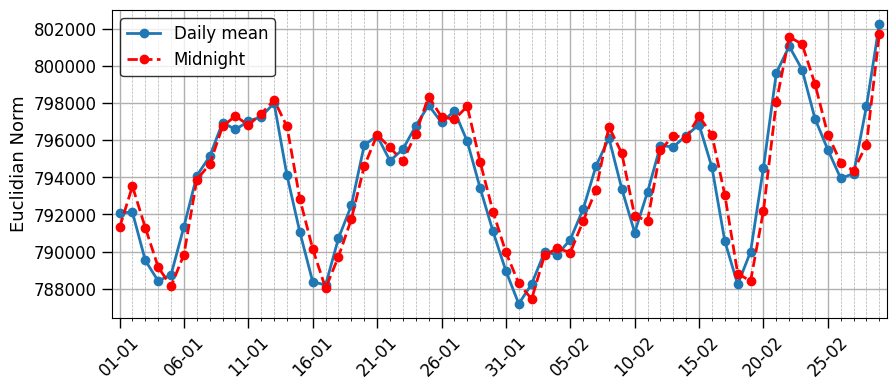

In [ ]:
nb_days = 60
height_hourly_norm = [np.linalg.norm(dataset_dict_hourly["geopotential_height"][hour]) for hour in range(0, nb_days*24, 1)]
height_mean_daily_norm = [np.mean(height_hourly_norm[i*24:(i+1)*24]) for i in range(0, nb_days, 1)]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(range(0, nb_days, 1), height_mean_daily_norm, marker="o", label="Daily mean", linewidth=2)
ax.plot(range(0, nb_days, 1), height_hourly_norm[::24], color="red", linestyle="--", marker="o", label="Midnight", linewidth=2)

### Set the dates as the x-axis labels ###
ticks_labels = [] ; months = ["01", "02"]
for day in range(0, nb_days, 5):
    month_idx = day // 31 ; day_in_month = day % 31
    ticks_labels.append(f"{day_in_month+1:02d}-{months[month_idx]}")
ax.set_xticks(ticks=np.arange(0, nb_days, 5), labels=ticks_labels, rotation=45) # Add major ticks for each fifth day    
ax.set_xticks(np.arange(0, nb_days, 1), minor=True) # Add minor ticks for each day
ax.grid(which='major', linestyle='-', linewidth=1) ; ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.tick_params(which='major', length=7.5, width=1, labelsize=12) 
ax.set_ylabel("Euclidian Norm", fontsize=13) ; ax.margins(x=0.01) ; ax.legend(fontsize=12, edgecolor='black') # ; ax.set_xlabel("Day") ; 
# ax.set_title(f"Daily mean of the norm and Midnight norm of the geopotential height data for the first {nb_days} days of the year {dataset_dict["first_year"]}")
# plt.savefig("Images/difference_daily_hourly_norm_geopotential_height_data.png", dpi=300, bbox_inches="tight")
plt.show()